In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from stimator import read_model

In [3]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

## Deterministic model for parameter estimation

In [4]:
cmv = '''
title Equatiosn from A Model for HCMV Infection in Immunosuppressed Patients
V' = n*delta*I - c*V - f*k*S*V
E' = (1-epsilon)*(mu*(1-E/e)*E + rho*V)
I' = k*S*V - delta*I - (1 - epsilon)*m*E*I + alpha*L - kappa*I
S' = lam*(1 - S/r)*S - k*S*V
L' = lam*(1 - L/s)*L - alpha*L + kappa*I

n = 5e1
delta = 2e-1
c = 3e-1
f = 1
k = 1e-4
epsilon = 0
mu = 4e-2
lam = 1e-3
e = 9
rho = 5
m = 1e-1
alpha = 2e-1
kappa =2e-3
r = 4e2
s = 4e-2

init: V = 1, E = 0, I = 0, S = 400, L = 0
'''

In [5]:
m = read_model(cmv)

names = ['V', 'E', 'I', 'S', 'L']
variables = ['Viurs', 'Effector', 'Infected', 'Susceptible', 'Latent']
s = m.solve(tf=90.0, npoints=101, outputs=names)

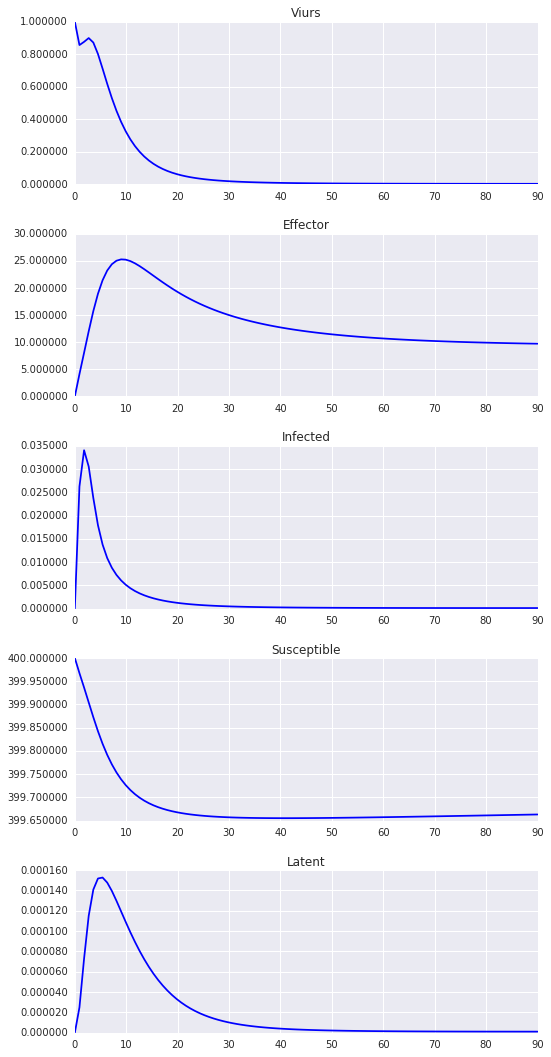

In [10]:
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(5, 1, figsize=(8, 15))
for i, (ax, name, title) in enumerate(zip(axes, names,variables)):
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    ax.plot(s.t, s[name])
    ax.set_title(title)
plt.tight_layout()